maybe add how far from cluster centroids hard examples are compared to normal ones?

Running t-SNE, please wait...


c:\Users\Christian\uni\GANs-Data-Diet\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


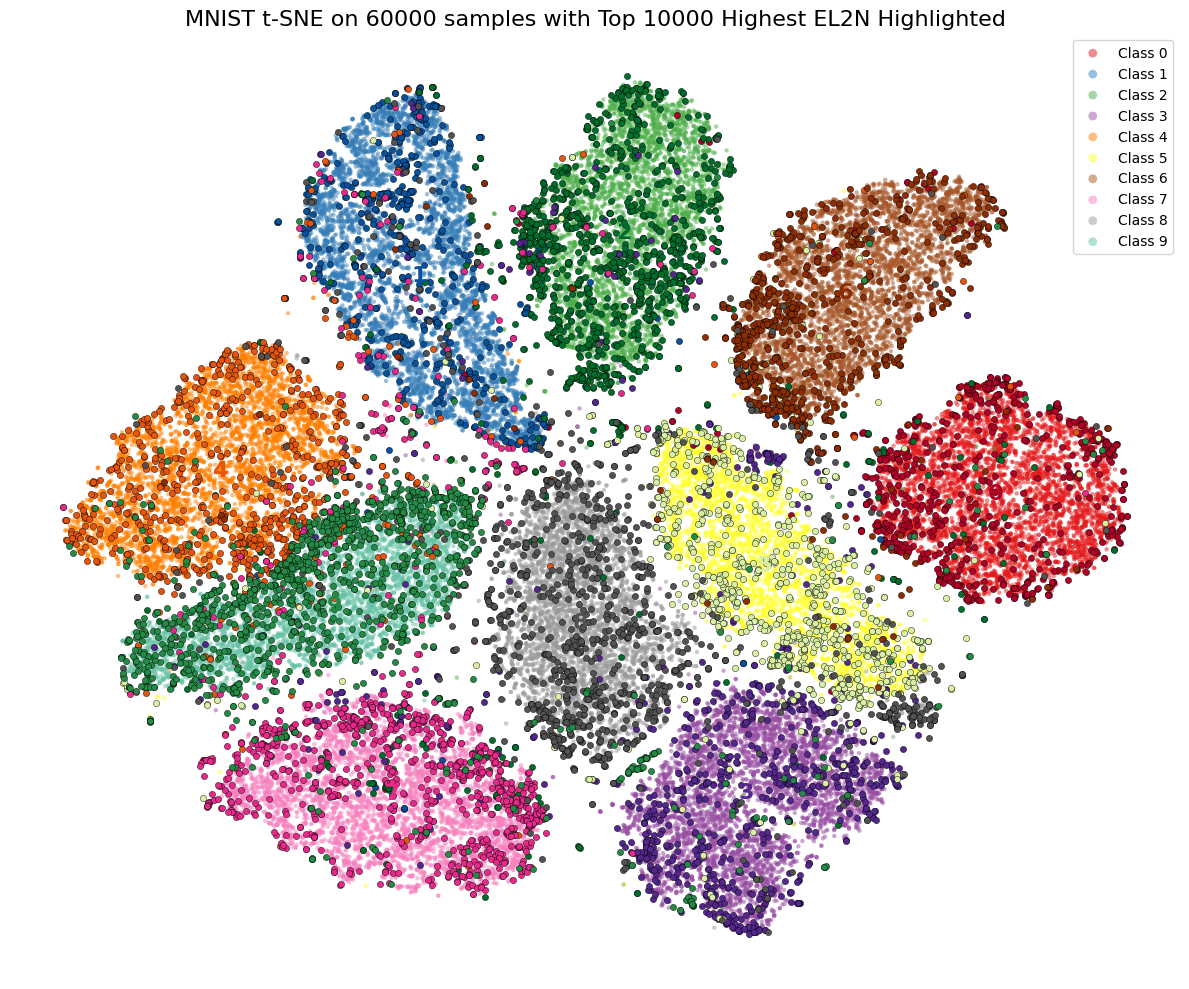

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
from torchvision import datasets, transforms

# 1. Load the CSV with EL2N scores.
csv_path = "data/el2n_scores_digits_sorted.csv"
el2n_df = pd.read_csv(csv_path)
el2n_scores = el2n_df.set_index('index')['el2n_score']

# 2. Load the MNIST training dataset.
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 3. Select a subset of 5000 samples
n_subset = 60000
subset_indices = np.random.choice(len(mnist_data), n_subset, replace=False)  # random subset
subset_indices.sort()  # Optional: sort for nicer reproducibility (not mandatory)

X = np.zeros((n_subset, 28*28))
labels = np.zeros(n_subset, dtype=int)
score_array = np.zeros(n_subset)

for i, idx in enumerate(subset_indices):
    img, label = mnist_data[idx]
    X[i] = img.numpy().reshape(-1)
    labels[i] = label
    score_array[i] = el2n_scores.get(idx, np.nan)  # get EL2N score based on original idx

# 4. Run t-SNE
print("Running t-SNE, please wait...")
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1000, init='random')
X_embedded = tsne.fit_transform(X)

# 5. Find top 500 examples by EL2N score
top_k = 10000
top_indices = np.argsort(-score_array)[:top_k]

# Set colors
# Distinct, vibrant colors (similar to Tableau 10 palette)
light_colors = [
    "#e41a1c",  # Red
    "#377eb8",  # Blue
    "#4daf4a",  # Green
    "#984ea3",  # Purple
    "#ff7f00",  # Orange
    "#ffff33",  # Yellow
    "#a65628",  # Brown
    "#f781bf",  # Pink
    "#999999",  # Gray
    "#66c2a5"   # Turquoise
]

dark_colors = [
    "#b10026",  # Dark red
    "#08519c",  # Dark blue
    "#006d2c",  # Dark green
    "#54278f",  # Dark purple
    "#e6550d",  # Dark orange
    "#d9f0a3",  # Light yellow-green
    "#8c2d04",  # Dark brown
    "#e7298a",  # Magenta
    "#525252",  # Dark gray
    "#238b45"   # Deep turquoise
]



# 6. Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all points with light colors
for cls in range(10):
    idx = labels == cls
    ax.scatter(
        X_embedded[idx, 0],
        X_embedded[idx, 1],
        color=light_colors[cls],
        label=f"Class {cls}",
        s=10,
        alpha=0.5,
        edgecolors='none'
    )

# Overlay top_k hard examples with darker color
for cls in range(10):
    idx = (labels == cls) & (np.isin(np.arange(len(labels)), top_indices))
    ax.scatter(
        X_embedded[idx, 0],
        X_embedded[idx, 1],
        color=dark_colors[cls],
        s=20,
        alpha=1.0,
        edgecolors='k',
        linewidth=0.3
    )

# Label class clusters
for cls in range(10):
    idx = labels == cls
    if np.sum(idx) == 0:
        continue
    median_x = np.median(X_embedded[idx, 0])
    median_y = np.median(X_embedded[idx, 1])
    ax.text(
        median_x,
        median_y,
        str(cls),
        fontsize=16,
        fontweight='bold',
        color=dark_colors[cls],
        ha='center',
        va='center'
    )

ax.set_title(f"MNIST t-SNE on {n_subset} samples with Top {top_k} Highest EL2N Highlighted", fontsize=16)
ax.axis('off')
ax.legend(markerscale=2, loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

In [3]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
from torchvision import datasets, transforms

# 1. Load the CSV with EL2N scores.
csv_path = "data/el2n_scores_digits_sorted.csv"
el2n_df = pd.read_csv(csv_path)
el2n_scores = el2n_df.set_index('index')['el2n_score']

# 2. Load the MNIST training dataset.
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 3. Select a subset of 5000 samples
n_subset = 60000
subset_indices = np.random.choice(len(mnist_data), n_subset, replace=False)  # random subset
subset_indices.sort()  # Optional: sort for nicer reproducibility (not mandatory)

X = np.zeros((n_subset, 28*28))
labels = np.zeros(n_subset, dtype=int)
score_array = np.zeros(n_subset)

for i, idx in enumerate(subset_indices):
    img, label = mnist_data[idx]
    X[i] = img.numpy().reshape(-1)
    labels[i] = label
    score_array[i] = el2n_scores.get(idx, np.nan)

# Run t-SNE in 3D
print("Running 3D t-SNE, please wait...")
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=50, n_iter=1000, init='random')
X_embedded_3d = tsne_3d.fit_transform(X)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame({
    'x': X_embedded_3d[:, 0],
    'y': X_embedded_3d[:, 1],
    'z': X_embedded_3d[:, 2],
    'label': labels
})

# Plot using Plotly
fig = px.scatter_3d(
    tsne_df,
    x='x',
    y='y',
    z='z',
    color=tsne_df['label'].astype(str),
    title="3D t-SNE Visualization of MNIST Digits",
    labels={'color': 'Class'}
)

fig.update_traces(marker=dict(size=3))
fig.show()

Running 3D t-SNE, please wait...


c:\Users\Christian\uni\GANs-Data-Diet\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [5]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.manifold import TSNE
import torch
from torchvision import datasets, transforms
import os # Added to check for file existence

# --- Configuration ---
csv_path = "data/el2n_scores_digits_sorted.csv"
data_root = './data'
n_subset = 60000 # Reduced subset size for potentially faster t-SNE on 3D
top_k = 10000   # Number of hardest examples to highlight
tsne_perplexity = 50 # Adjusted perplexity often needed for different n_components/datasets
tsne_iterations = 1000
tsne_random_state = 42

# --- Check if CSV file exists ---
if not os.path.exists(csv_path):
    print(f"Error: CSV file not found at {csv_path}")
    print("Please ensure the file 'el2n_scores_digits_sorted.csv' is in the 'data' directory.")
    # Exit or handle the error appropriately
    exit()

# 1. Load the CSV with EL2N scores.
print(f"Loading EL2N scores from {csv_path}...")
try:
    el2n_df = pd.read_csv(csv_path)
    # Ensure 'index' column exists and handle potential errors
    if 'index' not in el2n_df.columns:
        raise ValueError("CSV file must contain an 'index' column.")
    el2n_scores = el2n_df.set_index('index')['el2n_score']
    print("EL2N scores loaded successfully.")
except Exception as e:
    print(f"Error loading or processing CSV file: {e}")
    exit()

# 2. Load the MNIST training dataset.
print(f"Loading MNIST data from {data_root}...")
try:
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    # Ensure the directory exists or download=True will create it
    os.makedirs(data_root, exist_ok=True)
    mnist_data = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
    print("MNIST data loaded successfully.")
except Exception as e:
    print(f"Error loading MNIST data: {e}")
    exit()


# 3. Select a subset of samples
print(f"Selecting a subset of {n_subset} samples...")
if n_subset > len(mnist_data):
    print(f"Warning: n_subset ({n_subset}) is larger than the dataset size ({len(mnist_data)}). Using all samples.")
    n_subset = len(mnist_data)
    subset_indices = np.arange(len(mnist_data))
else:
    subset_indices = np.random.choice(len(mnist_data), n_subset, replace=False) # random subset
    subset_indices.sort() # Sort for reproducibility

X = np.zeros((n_subset, 28*28))
labels = np.zeros(n_subset, dtype=int)
score_array = np.zeros(n_subset)
original_indices = np.zeros(n_subset, dtype=int) # Keep track of original MNIST indices

for i, idx in enumerate(subset_indices):
    try:
        img, label = mnist_data[idx]
        X[i] = img.numpy().reshape(-1)
        labels[i] = label
        # Use .get(idx, default_value) for safer dictionary access
        score_array[i] = el2n_scores.get(idx, np.nan)
        original_indices[i] = idx # Store the original index
    except IndexError:
        print(f"Warning: Index {idx} out of bounds for MNIST data. Skipping.")
        # Handle skipped indices if necessary, e.g., by resizing arrays later
        pass # Or implement alternative handling

# Handle potential NaNs in scores if some indices weren't in the CSV
nan_scores_count = np.isnan(score_array).sum()
if nan_scores_count > 0:
    print(f"Warning: {nan_scores_count} samples had no corresponding EL2N score found. They will be treated as having a low score.")
    # Replace NaN with a very low score, or handle as needed
    score_array = np.nan_to_num(score_array, nan=-np.inf)

print("Subset selection complete.")

# 4. Run t-SNE (3D)
print(f"Running 3D t-SNE (perplexity={tsne_perplexity}, n_iter={tsne_iterations})... This may take a while.")
tsne = TSNE(n_components=3, # Changed to 3 for 3D
            random_state=tsne_random_state,
            perplexity=tsne_perplexity,
            n_iter=tsne_iterations,
            init='random', # 'pca' initialization can sometimes be faster/more stable
            n_jobs=-1) # Use all available CPU cores
X_embedded = tsne.fit_transform(X)
print("t-SNE calculation complete.")

# 5. Find top k examples by EL2N score within the subset
print(f"Identifying the top {top_k} hardest examples...")
# Ensure top_k is not larger than the number of valid scores
valid_indices = ~np.isinf(score_array) # Exclude potential -inf scores if NaNs were present
valid_scores = score_array[valid_indices]
valid_subset_indices = np.arange(n_subset)[valid_indices]

if top_k > len(valid_scores):
    print(f"Warning: top_k ({top_k}) is larger than the number of samples with valid scores ({len(valid_scores)}). Highlighting all valid samples.")
    top_k = len(valid_scores)

# Get indices relative to the *subset* array `X`
if len(valid_scores) > 0:
    sorted_score_indices = np.argsort(-valid_scores) # Sort descending
    top_subset_indices = valid_subset_indices[sorted_score_indices[:top_k]]
else:
    top_subset_indices = np.array([], dtype=int) # Empty array if no valid scores

is_top_k = np.zeros(n_subset, dtype=bool)
is_top_k[top_subset_indices] = True
print(f"Top {len(top_subset_indices)} examples identified.")


# Set colors (same as before)
light_colors = [
    "#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00",
    "#ffff33", "#a65628", "#f781bf", "#999999", "#66c2a5"
]
dark_colors = [
    "#b10026", "#08519c", "#006d2c", "#54278f", "#e6550d",
    "#cca300", "#8c2d04", "#e7298a", "#525252", "#238b45" # Adjusted dark yellow
]

# 6. Plot using Plotly
print("Generating Plotly 3D scatter plot...")
fig = go.Figure()

# Plot all points first with lighter colors
for cls in range(10):
    idx = labels == cls
    if not np.any(idx): continue # Skip if class not in subset

    # Create hover text: Class, Original Index, EL2N Score
    hover_texts = [f"Class: {labels[i]}<br>Orig Idx: {original_indices[i]}<br>EL2N: {score_array[i]:.4f}"
                   for i in np.where(idx)[0]]

    fig.add_trace(go.Scatter3d(
        x=X_embedded[idx, 0],
        y=X_embedded[idx, 1],
        z=X_embedded[idx, 2],
        mode='markers',
        marker=dict(
            size=3, # Smaller size for background points
            color=light_colors[cls],
            opacity=0.4, # Lower opacity for background
            line=dict(width=0) # No border for background points
        ),
        name=f"Class {cls}", # Legend entry for the class
        hoverinfo='text',
        hovertext=hover_texts,
        showlegend=True # Show legend entry for this trace
    ))

# Overlay top_k hard examples with darker color and outline
for cls in range(10):
    # Indices for points that are BOTH class `cls` AND in the top_k hardest
    idx_hard = (labels == cls) & is_top_k
    if not np.any(idx_hard): continue # Skip if no hard examples for this class

    # Create hover text for hard examples
    hover_texts_hard = [f"Class: {labels[i]}<br>Orig Idx: {original_indices[i]}<br>EL2N: {score_array[i]:.4f} (Top {top_k})"
                        for i in np.where(idx_hard)[0]]

    fig.add_trace(go.Scatter3d(
        x=X_embedded[idx_hard, 0],
        y=X_embedded[idx_hard, 1],
        z=X_embedded[idx_hard, 2],
        mode='markers',
        marker=dict(
            size=5, # Larger size for highlighted points
            color=dark_colors[cls],
            opacity=0.9, # Higher opacity
            line=dict(color='black', width=1) # Black outline
        ),
        name=f"Class {cls} (Hard)", # Separate legend entry for hard examples
        hoverinfo='text',
        hovertext=hover_texts_hard,
        showlegend=True # Show legend entry for hard examples
    ))

# Add text labels for class clusters near the median
for cls in range(10):
    idx = labels == cls
    if not np.any(idx): continue

    median_point = np.median(X_embedded[idx, :], axis=0)
    fig.add_trace(go.Scatter3d(
        x=[median_point[0]],
        y=[median_point[1]],
        z=[median_point[2]],
        mode='text',
        text=[str(cls)],
        textfont=dict(
            size=16,
            color=dark_colors[cls], # Use dark color for visibility
            family="Arial, sans-serif"
        ),
        hoverinfo='none', # No hover info for the text labels
        showlegend=False # Don't show these in the legend
    ))


# Update layout for better presentation
fig.update_layout(
    title=f"MNIST 3D t-SNE ({n_subset} samples) - Top {top_k} Hardest Highlighted (by EL2N)",
    legend_title_text='Classes',
    scene=dict(
        xaxis=dict(visible=False), # Hide axes for cleaner look
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
        bgcolor='rgba(240, 240, 240, 0.95)' # Light background color
    ),
    margin=dict(l=0, r=0, b=0, t=40), # Reduce margins
    legend=dict(itemsizing='constant', # Keep legend marker sizes consistent
                bgcolor='rgba(255,255,255,0.7)') # Semi-transparent legend background
)

print("Displaying interactive plot...")
fig.show()


Loading EL2N scores from data/el2n_scores_digits_sorted.csv...
EL2N scores loaded successfully.
Loading MNIST data from ./data...
MNIST data loaded successfully.
Selecting a subset of 60000 samples...
Subset selection complete.
Running 3D t-SNE (perplexity=50, n_iter=1000)... This may take a while.


c:\Users\Christian\uni\GANs-Data-Diet\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



t-SNE calculation complete.
Identifying the top 10000 hardest examples...
Top 10000 examples identified.
Generating Plotly 3D scatter plot...
Displaying interactive plot...


In [7]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.manifold import TSNE
import torch
from torchvision import datasets, transforms
import os # Added to check for file existence

# --- Configuration ---
csv_path = "data/el2n_scores_digits_sorted.csv"
data_root = './data'
n_subset = 10000 # Reduced subset size for potentially faster t-SNE on 3D
top_k = 1000   # Number of hardest examples to highlight
tsne_perplexity = 50 # Adjusted perplexity often needed for different n_components/datasets
tsne_iterations = 1000
tsne_random_state = 42

# --- Check if CSV file exists ---
if not os.path.exists(csv_path):
    print(f"Error: CSV file not found at {csv_path}")
    print("Please ensure the file 'el2n_scores_digits_sorted.csv' is in the 'data' directory.")
    # Exit or handle the error appropriately
    exit()

# 1. Load the CSV with EL2N scores.
print(f"Loading EL2N scores from {csv_path}...")
try:
    el2n_df = pd.read_csv(csv_path)
    # Ensure 'index' column exists and handle potential errors
    if 'index' not in el2n_df.columns:
        raise ValueError("CSV file must contain an 'index' column.")
    el2n_scores = el2n_df.set_index('index')['el2n_score']
    print("EL2N scores loaded successfully.")
except Exception as e:
    print(f"Error loading or processing CSV file: {e}")
    exit()

# 2. Load the MNIST training dataset.
print(f"Loading MNIST data from {data_root}...")
try:
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    # Ensure the directory exists or download=True will create it
    os.makedirs(data_root, exist_ok=True)
    mnist_data = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
    print("MNIST data loaded successfully.")
except Exception as e:
    print(f"Error loading MNIST data: {e}")
    exit()


# 3. Select a subset of samples
print(f"Selecting a subset of {n_subset} samples...")
if n_subset > len(mnist_data):
    print(f"Warning: n_subset ({n_subset}) is larger than the dataset size ({len(mnist_data)}). Using all samples.")
    n_subset = len(mnist_data)
    subset_indices = np.arange(len(mnist_data))
else:
    subset_indices = np.random.choice(len(mnist_data), n_subset, replace=False) # random subset
    subset_indices.sort() # Sort for reproducibility

X = np.zeros((n_subset, 28*28))
labels = np.zeros(n_subset, dtype=int)
score_array = np.zeros(n_subset)
original_indices = np.zeros(n_subset, dtype=int) # Keep track of original MNIST indices

for i, idx in enumerate(subset_indices):
    try:
        img, label = mnist_data[idx]
        X[i] = img.numpy().reshape(-1)
        labels[i] = label
        # Use .get(idx, default_value) for safer dictionary access
        score_array[i] = el2n_scores.get(idx, np.nan)
        original_indices[i] = idx # Store the original index
    except IndexError:
        print(f"Warning: Index {idx} out of bounds for MNIST data. Skipping.")
        # Handle skipped indices if necessary, e.g., by resizing arrays later
        pass # Or implement alternative handling

# Handle potential NaNs in scores if some indices weren't in the CSV
nan_scores_count = np.isnan(score_array).sum()
if nan_scores_count > 0:
    print(f"Warning: {nan_scores_count} samples had no corresponding EL2N score found. They will be treated as having a low score.")
    # Replace NaN with a very low score, or handle as needed
    score_array = np.nan_to_num(score_array, nan=-np.inf)

print("Subset selection complete.")

# 4. Run t-SNE (3D)
print(f"Running 3D t-SNE (perplexity={tsne_perplexity}, n_iter={tsne_iterations})... This may take a while.")
tsne = TSNE(n_components=3, # Changed to 3 for 3D
            random_state=tsne_random_state,
            perplexity=tsne_perplexity,
            n_iter=tsne_iterations,
            init='random', # 'pca' initialization can sometimes be faster/more stable
            n_jobs=-1) # Use all available CPU cores
X_embedded = tsne.fit_transform(X)
print("t-SNE calculation complete.")

# 5. Find top k examples by EL2N score within the subset
print(f"Identifying the top {top_k} hardest examples...")
# Ensure top_k is not larger than the number of valid scores
valid_indices = ~np.isinf(score_array) # Exclude potential -inf scores if NaNs were present
valid_scores = score_array[valid_indices]
valid_subset_indices = np.arange(n_subset)[valid_indices]

if top_k > len(valid_scores):
    print(f"Warning: top_k ({top_k}) is larger than the number of samples with valid scores ({len(valid_scores)}). Highlighting all valid samples.")
    top_k = len(valid_scores)

# Get indices relative to the *subset* array `X`
if len(valid_scores) > 0:
    sorted_score_indices = np.argsort(-valid_scores) # Sort descending
    top_subset_indices = valid_subset_indices[sorted_score_indices[:top_k]]
else:
    top_subset_indices = np.array([], dtype=int) # Empty array if no valid scores

is_top_k = np.zeros(n_subset, dtype=bool)
is_top_k[top_subset_indices] = True
print(f"Top {len(top_subset_indices)} examples identified.")


# Set colors (same as before)
light_colors = [
    "#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00",
    "#ffff33", "#a65628", "#f781bf", "#999999", "#66c2a5"
]
dark_colors = [
    "#b10026", "#08519c", "#006d2c", "#54278f", "#e6550d",
    "#cca300", "#8c2d04", "#e7298a", "#525252", "#238b45" # Adjusted dark yellow
]

# 6. Plot using Plotly
print("Generating Plotly 3D scatter plot...")
fig = go.Figure()

# Plot 'easy' points first with lighter colors and LOW opacity
for cls in range(10):
    idx = (labels == cls) & (~is_top_k) # Select only NON-hard examples for this trace
    if not np.any(idx): continue # Skip if no easy examples for this class

    # Create hover text: Class, Original Index, EL2N Score
    hover_texts = [f"Class: {labels[i]}<br>Orig Idx: {original_indices[i]}<br>EL2N: {score_array[i]:.4f}"
                   for i in np.where(idx)[0]]

    fig.add_trace(go.Scatter3d(
        x=X_embedded[idx, 0],
        y=X_embedded[idx, 1],
        z=X_embedded[idx, 2],
        mode='markers',
        marker=dict(
            size=3,
            color=light_colors[cls],
            opacity=0.15,
            line=dict(width=0)
        ),
        name=f"Class {cls}", # <<< RENAMED: Legend entry for easy examples of this class
        hoverinfo='text',
        hovertext=hover_texts,
        showlegend=True
    ))

# Overlay top_k hard examples with darker color, outline, and LARGER size
for cls in range(10):
    # Indices for points that are BOTH class `cls` AND in the top_k hardest
    idx_hard = (labels == cls) & is_top_k
    if not np.any(idx_hard): continue # Skip if no hard examples for this class

    # Create hover text for hard examples
    hover_texts_hard = [f"Class: {labels[i]}<br>Orig Idx: {original_indices[i]}<br>EL2N: {score_array[i]:.4f} (Top {top_k})"
                        for i in np.where(idx_hard)[0]]

    fig.add_trace(go.Scatter3d(
        x=X_embedded[idx_hard, 0],
        y=X_embedded[idx_hard, 1],
        z=X_embedded[idx_hard, 2],
        mode='markers',
        marker=dict(
            size=6,
            color=dark_colors[cls],
            opacity=0.9,
            line=dict(color='black', width=1)
        ),
        name=f"Class {cls} (Hard)", # <<< KEPT NAME: Legend entry for hard examples
        hoverinfo='text',
        hovertext=hover_texts_hard,
        showlegend=True
    ))

# Add text labels for class clusters near the median (using all points for median calculation)
for cls in range(10):
    idx_all_cls = labels == cls # Use all points of the class to find its center
    if not np.any(idx_all_cls): continue

    median_point = np.median(X_embedded[idx_all_cls, :], axis=0)
    fig.add_trace(go.Scatter3d(
        x=[median_point[0]],
        y=[median_point[1]],
        z=[median_point[2]],
        mode='text',
        text=[str(cls)],
        textfont=dict(
            size=18,
            color=dark_colors[cls],
            family="Arial Black, sans-serif"
        ),
        hoverinfo='none',
        showlegend=False
    ))


# Update layout for better presentation
fig.update_layout(
    title=f"MNIST 3D t-SNE ({n_subset} samples) - Top {top_k} Hardest Highlighted (by EL2N)",
    legend_title_text='Class / Type', # Updated legend title slightly
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
        bgcolor='rgba(250, 250, 250, 0.95)'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(itemsizing='constant',
                bgcolor='rgba(255,255,255,0.7)')
)

print("Displaying interactive plot...")
fig.show()


Loading EL2N scores from data/el2n_scores_digits_sorted.csv...
EL2N scores loaded successfully.
Loading MNIST data from ./data...
MNIST data loaded successfully.
Selecting a subset of 10000 samples...
Subset selection complete.
Running 3D t-SNE (perplexity=50, n_iter=1000)... This may take a while.


c:\Users\Christian\uni\GANs-Data-Diet\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



t-SNE calculation complete.
Identifying the top 1000 hardest examples...
Top 1000 examples identified.
Generating Plotly 3D scatter plot...
Displaying interactive plot...


Running t-SNE, please wait...


c:\Users\Christian\uni\GANs-Data-Diet\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


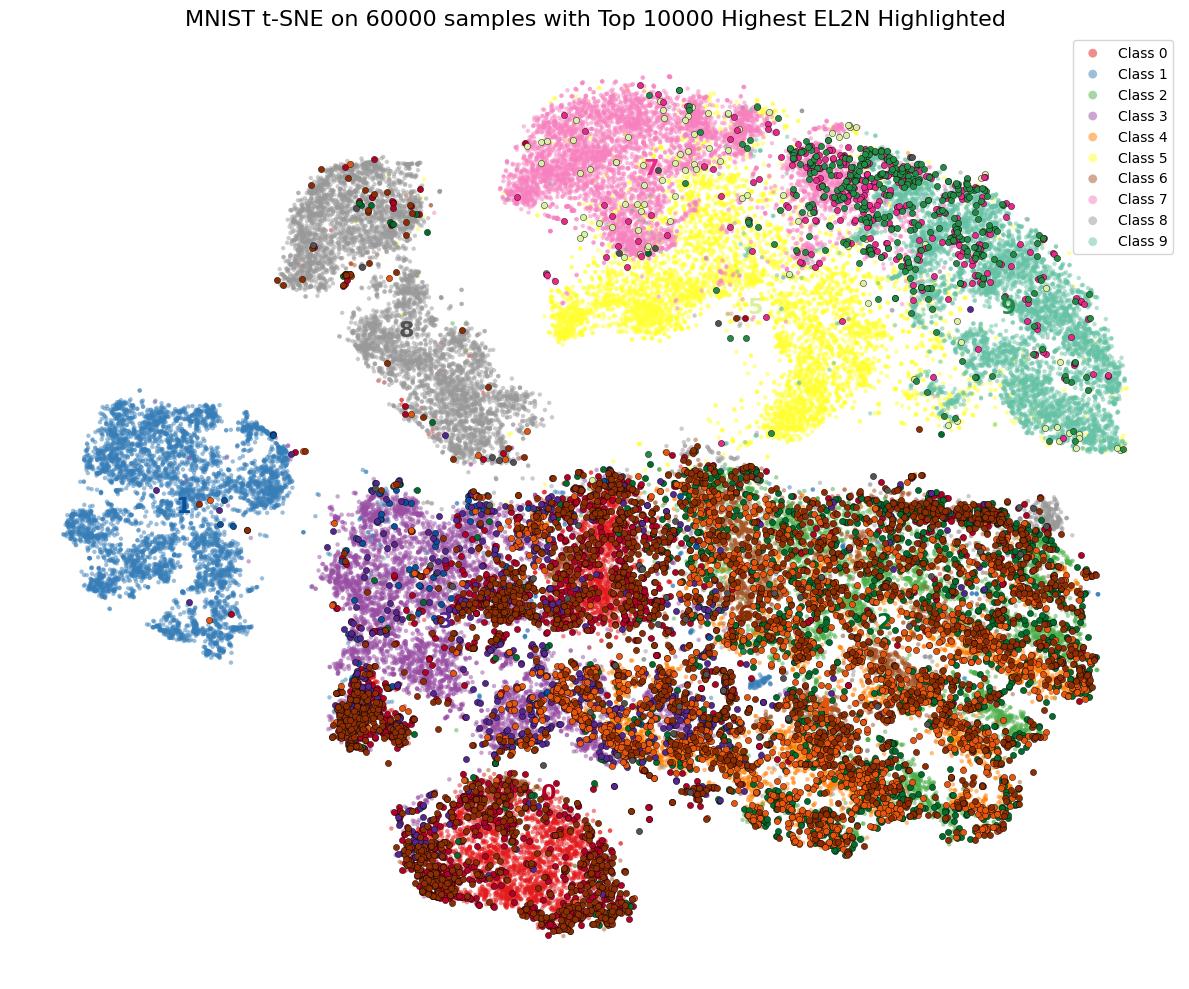

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
from torchvision import datasets, transforms

# 1. Load the CSV with EL2N scores.
csv_path = "data/el2n_scores_fashion_sorted.csv"
el2n_df = pd.read_csv(csv_path)
el2n_scores = el2n_df.set_index('index')['el2n_score']

# 2. Load the MNIST training dataset.
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# 3. Select a subset of 5000 samples
n_subset = 60000
subset_indices = np.random.choice(len(mnist_data), n_subset, replace=False)  # random subset
subset_indices.sort()  # Optional: sort for nicer reproducibility (not mandatory)

X = np.zeros((n_subset, 28*28))
labels = np.zeros(n_subset, dtype=int)
score_array = np.zeros(n_subset)

for i, idx in enumerate(subset_indices):
    img, label = mnist_data[idx]
    X[i] = img.numpy().reshape(-1)
    labels[i] = label
    score_array[i] = el2n_scores.get(idx, np.nan)  # get EL2N score based on original idx

# 4. Run t-SNE
print("Running t-SNE, please wait...")
tsne = TSNE(n_components=2, random_state=42, perplexity=75, n_iter=1000, init='random')
X_embedded = tsne.fit_transform(X)

# 5. Find top 500 examples by EL2N score
top_k = 10000
top_indices = np.argsort(-score_array)[:top_k]

# Set colors
# Distinct, vibrant colors (similar to Tableau 10 palette)
light_colors = [
    "#e41a1c",  # Red
    "#377eb8",  # Blue
    "#4daf4a",  # Green
    "#984ea3",  # Purple
    "#ff7f00",  # Orange
    "#ffff33",  # Yellow
    "#a65628",  # Brown
    "#f781bf",  # Pink
    "#999999",  # Gray
    "#66c2a5"   # Turquoise
]

dark_colors = [
    "#b10026",  # Dark red
    "#08519c",  # Dark blue
    "#006d2c",  # Dark green
    "#54278f",  # Dark purple
    "#e6550d",  # Dark orange
    "#d9f0a3",  # Light yellow-green
    "#8c2d04",  # Dark brown
    "#e7298a",  # Magenta
    "#525252",  # Dark gray
    "#238b45"   # Deep turquoise
]



# 6. Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all points with light colors
for cls in range(10):
    idx = labels == cls
    ax.scatter(
        X_embedded[idx, 0],
        X_embedded[idx, 1],
        color=light_colors[cls],
        label=f"Class {cls}",
        s=10,
        alpha=0.5,
        edgecolors='none'
    )

# Overlay top_k hard examples with darker color
for cls in range(10):
    idx = (labels == cls) & (np.isin(np.arange(len(labels)), top_indices))
    ax.scatter(
        X_embedded[idx, 0],
        X_embedded[idx, 1],
        color=dark_colors[cls],
        s=20,
        alpha=1.0,
        edgecolors='k',
        linewidth=0.3
    )

# Label class clusters
for cls in range(10):
    idx = labels == cls
    if np.sum(idx) == 0:
        continue
    median_x = np.median(X_embedded[idx, 0])
    median_y = np.median(X_embedded[idx, 1])
    ax.text(
        median_x,
        median_y,
        str(cls),
        fontsize=16,
        fontweight='bold',
        color=dark_colors[cls],
        ha='center',
        va='center'
    )

ax.set_title(f"MNIST t-SNE on {n_subset} samples with Top {top_k} Highest EL2N Highlighted", fontsize=16)
ax.axis('off')
ax.legend(markerscale=2, loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()